<a href="https://colab.research.google.com/github/shreyasrajesh0308/Deep_Learning/blob/master/Chapter_5_Fundamentals_ipynb_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Machine Learning

## Generalizing: The goal of Machine Learning

Generalizing and optimization are in some ense rivals in machine learning. While Generalizing is trying to optimize for any dataset Optimization is focussed on reducing the loss for the train set. Hence in the training process we generally have 3 cycles.

**Underfitting** : The model can still learn i.e here optimization and generalization are directly correlated since as the training loss decreases the validation loss also decreases.

**Robust fit**: Optimzal point for both generalization and optimization, the validation loss is now stalling with the training loss.

**Overfit**: At this point the validation loss is starting to increase as the training loss decreseas. Here the system is optimizing for the data but is not generalizing. 


Rare Features and Spurious correlations are two main factors that lead to overfitting. 

**Rare Features**: machine learning models trained on datasets that include rare feature values are highly susceptible to overfitting. In a sentiment classification task, if the word “cherimoya” (a fruit native to the Andes) only appears in one text in the train- ing data, and this text happens to be negative in sentiment, a poorly regularized model might put a very high weight on this word and always classify new texts that mention cherimoyas as negative, whereas, objectively, there’s nothing negative about the cherimoya.

**Spurious Correlation**: If you’ve only ever seen two orange tabby cats in your life, and they both happened to be terribly antisocial, you might infer that orange tabby cats are generally likely to be antisocial. That’s overfitting: if you had been exposed to a wider variety of cats, includ- ing more orange ones, you’d have learned that cat color is not well correlated with character.

Importantly, a feature value doesn’t need to occur only a couple of times to lead to spurious correlations. Consider a word that occurs in 100 samples in your training data and that’s associated with a positive sentiment 54% of the time and with a nega- tive sentiment 46% of the time. That difference may well be a complete statistical fluke, yet your model is likely to learn to leverage that feature for its classification task. This is one of the most common sources of overfitting.


Here’s a striking example. Take MNIST. Create a new training set by concatenating 784 white noise dimensions to the existing 784 dimensions of the data, so half of the data is now noise. For comparison, also create an equivalent dataset by concatenating 784 all-zeros dimensions. Our concatenation of meaningless features does not at all affect the information content of the data: we’re only adding something. Human clas- sification accuracy wouldn’t be affected by these transformations at all.



In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np 

(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)


11501568/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():

  model = keras.Sequential([
                            layers.Dense(512, activation = "relu"),
                            layers.Dense(10, activation = "softmax")
                          ])
  
  
  model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


  return model

In [4]:
model = get_model() 

history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.5985 - accuracy: 0.8156 - val_loss: 0.2898 - val_accuracy: 0.9110
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2452 - accuracy: 0.9245 - val_loss: 0.1978 - val_accuracy: 0.9413
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1610 - accuracy: 0.9501 - val_loss: 0.1636 - val_accuracy: 0.9523
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1144 - accuracy: 0.9641 - val_loss: 0.1444 - val_accuracy: 0.9554
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0828 - accuracy: 0.9741 - val_loss: 0.1386 - val_accuracy: 0.9581
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0618 - accuracy: 0.9798 - val_loss: 0.1099 - val_accuracy: 0.9688
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0477 - accuracy: 0.9843 - val_loss: 0.1243 - val_accuracy: 0.9663
Epoch 

In [5]:
model = get_model() 

history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.2886 - accuracy: 0.9164 - val_loss: 0.1527 - val_accuracy: 0.9548
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1203 - accuracy: 0.9645 - val_loss: 0.1158 - val_accuracy: 0.9650
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0790 - accuracy: 0.9764 - val_loss: 0.0966 - val_accuracy: 0.9697
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.0898 - val_accuracy: 0.9737
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0428 - accuracy: 0.9874 - val_loss: 0.0800 - val_accuracy: 0.9774
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0862 - val_accuracy: 0.9770
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0246 - accuracy: 0.9928 - val_loss: 0.0828 - val_accuracy: 0.9770
Epoch 

Comparing Validation accuracy of both we have

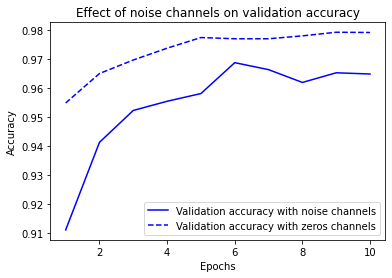

In [8]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Here, it is visible that there is about a 1% drop in the accuracy for the validation in the case of the random noise sample. The more noise channels you add, the further accuracy will degrade.

Noisy features inevitably lead to overfitting. As such, in cases where you aren’t sure whether the features you have are informative or distracting, it’s common to do feature selection before training. Restricting the IMDB data to the top 10,000 most common words was a crude form of feature selection, for instance. The typical way to do feature selection is to compute some usefulness score for each feature available—a measure of how informative the feature is with respect to the task, such as the mutual information between the feature and the labels—and only keep features that are above some threshold. Doing this would filter out the white noise channels in the preceding example.

#### The Nature of Generalization in Deep Learning

A remarkable fact about deep learning models is that they can be trained to fit anything, as long as they have enough representational power.

In the next example, we just shuffle the labels for the training data and we see that the training loss still goes on decreasing. 

In [14]:
(train_images, train_labels) , _ = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = get_model()

model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3170 - accuracy: 0.1009 - val_loss: 2.3073 - val_accuracy: 0.0975
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3002 - accuracy: 0.1156 - val_loss: 2.3119 - val_accuracy: 0.0992
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2914 - accuracy: 0.1281 - val_loss: 2.3196 - val_accuracy: 0.1019
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2790 - accuracy: 0.1380 - val_loss: 2.3227 - val_accuracy: 0.1082
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2611 - accuracy: 0.1519 - val_loss: 2.3398 - val_accuracy: 0.1007
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2413 - accuracy: 0.1686 - val_loss: 2.3450 - val_accuracy: 0.1051
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2184 - accuracy: 0.1789 - val_loss: 2.3630 - val_accuracy: 0.1015

As seen above the trianing accuracy in increasing but the validation obviously cant grow. 

In fact, you don’t even need to do this with MNIST data—you could just generate white noise inputs and random labels. You could fit a model on that, too, as long as it has enough parameters. It would just end up memorizing specific inputs, much like a Python dictionary.

But if thats the case how do deep learning models generalize at all? should it be some form of mapping between training and labels like a dictionary.

As it turns out, the nature of generalization in deep learning has rather little to do with deep learning models themselves, and much to do with the structure of information in the real world. Let’s take a look at what’s really going on here.

#### The Manifold Hypothesis